In [ ]:
# Install permetrics
!pip install permetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
from permetrics.regression import RegressionMetric
import matplotlib.pyplot as plt

In [ ]:
# Import the result dataframes
ml_train_out = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Output Data/outputs_train_120225.csv')
ml_test_out = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Output Data/outputs_test_120225.csv')
tn_train_out = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Output Data/tn_train_out_120225.csv')
tn_test_out = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Output Data/tn_test_out_120225.csv')
mlp_train_out = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Output Data/mlp_train_out_120225.csv')
mlp_test_out = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Output Data/mlp_test_out_120225.csv')
kans_train_out = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Output Data/kans_output_train.csv')
kans_test_out = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Output Data/kans_output_test.csv')
kans_train_out

,Actual,Test Predicted
0,2.69,2.632099
1,2.05,2.027142
2,2.61,2.616556
3,3.09,3.027247
4,4.05,3.972676
...,...,...
3067,1.51,1.519009
3068,2.83,2.827101
3069,2.98,2.924830
3070,1.72,1.651200


# **EVALUATION**

## **Multiple Linear Regression**

In [ ]:
# Get the evaluation metrics from the train set
train_lr_mse = mean_squared_error(ml_train_out['y_actual'], ml_train_out['y_linear'])
train_lr_rmse = math.sqrt(train_lr_mse)
train_lr_r2 = r2_score(ml_train_out['y_actual'], ml_train_out['y_linear'])
train_lr_mape = mean_absolute_percentage_error(ml_train_out['y_actual'], ml_train_out['y_linear'])
train_lr_a20_index = RegressionMetric(np.array(ml_train_out['y_actual']), np.array(ml_train_out['y_linear'])).a20_index()
print('RMSE: ', train_lr_rmse)
print('MAPE: ', train_lr_mape)
print('R2: ', train_lr_r2)
print('A20 Index: ', train_lr_a20_index)

RMSE:  0.37825944322342575
MAPE:  0.13718662766971088
R2:  0.8198279584032697
A20 Index:  0.7867838541666666


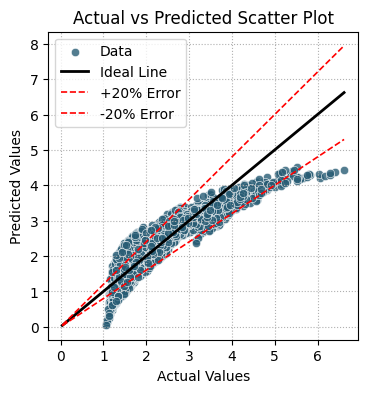

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(ml_train_out['y_actual'])
y_predicted = np.array(ml_train_out['y_linear'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(0, 7, 1))  # X-axis ticks
plt.yticks(np.arange(0, 9, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

In [ ]:
# Get the evaluation metrics from the test set
test_lr_mse = mean_squared_error(ml_test_out['y_actual'], ml_test_out['y_linear'])
test_lr_rmse = math.sqrt(test_lr_mse)
test_lr_r2 = r2_score(ml_test_out['y_actual'], ml_test_out['y_linear'])
test_lr_mape = mean_absolute_percentage_error(ml_test_out['y_actual'], ml_test_out['y_linear'])
test_lr_a20_index = RegressionMetric(np.array(ml_test_out['y_actual']), np.array(ml_test_out['y_linear'])).a20_index()
print('RMSE: ', test_lr_rmse)
print('MAPE: ', test_lr_mape)
print('R2: ', test_lr_r2)
print('A20 Index: ', test_lr_a20_index)

RMSE:  0.35495303494541536
MAPE:  0.13105918395090002
R2:  0.8167975836481938
A20 Index:  0.8125


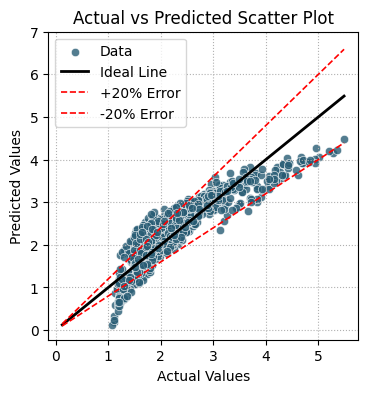

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(ml_test_out['y_actual'])
y_predicted = np.array(ml_test_out['y_linear'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(0, 6, 1))  # X-axis ticks
plt.yticks(np.arange(0, 8, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

## **Support Vector Regression**

In [ ]:
# Get the evaluation metrics from the train set
train_svr_mse = mean_squared_error(ml_train_out['y_actual'], ml_train_out['y_supportvector'])
train_svr_rmse = math.sqrt(train_svr_mse)
train_svr_r2 = r2_score(ml_train_out['y_actual'], ml_train_out['y_supportvector'])
train_svr_mape = mean_absolute_percentage_error(ml_train_out['y_actual'], ml_train_out['y_supportvector'])
train_svr_a20_index = RegressionMetric(np.array(ml_train_out['y_actual']), np.array(ml_train_out['y_supportvector'])).a20_index()
print('RMSE: ', train_svr_rmse)
print('MAPE: ', train_svr_mape)
print('R2: ', train_svr_r2)
print('A20 Index: ', train_svr_a20_index)

RMSE:  0.16790468850765067
MAPE:  0.06935114196211
R2:  0.9644995802119201
A20 Index:  0.9915364583333334


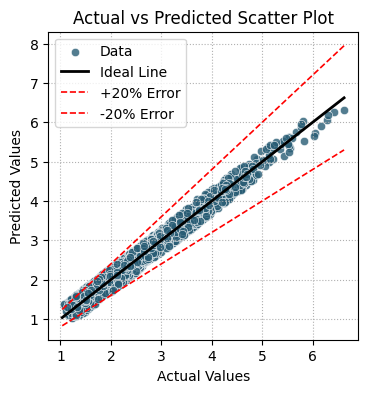

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(ml_train_out['y_actual'])
y_predicted = np.array(ml_train_out['y_supportvector'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(1, 7, 1))  # X-axis ticks
plt.yticks(np.arange(1, 9, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

In [ ]:
# Get the evaluation metrics from the test set
test_svr_mse = mean_squared_error(ml_test_out['y_actual'], ml_test_out['y_supportvector'])
test_svr_rmse = math.sqrt(test_svr_mse)
test_svr_r2 = r2_score(ml_test_out['y_actual'], ml_test_out['y_supportvector'])
test_svr_mape = mean_absolute_percentage_error(ml_test_out['y_actual'], ml_test_out['y_supportvector'])
test_svr_a20_index = RegressionMetric(np.array(ml_test_out['y_actual']), np.array(ml_test_out['y_supportvector'])).a20_index()
print('RMSE: ', test_svr_rmse)
print('MAPE: ', test_svr_mape)
print('R2: ', test_svr_r2)
print('A20 Index: ', test_svr_a20_index)

RMSE:  0.16475800339579375
MAPE:  0.06786084469125196
R2:  0.9605286072743483
A20 Index:  0.9934895833333334


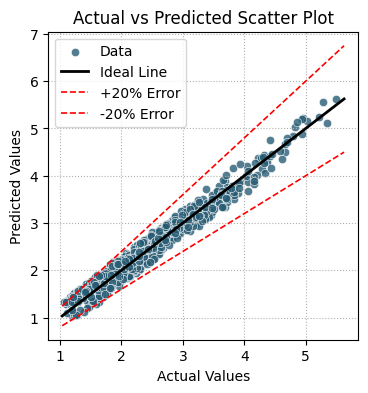

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(ml_test_out['y_actual'])
y_predicted = np.array(ml_test_out['y_supportvector'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(1, 6, 1))  # X-axis ticks
plt.yticks(np.arange(1, 8, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

## **TabNet Regressor**

In [ ]:
# Get the evaluation metrics from the train set
train_tn_mse = mean_squared_error(tn_train_out['Actual'], tn_train_out['Predicted'])
train_tn_rmse = math.sqrt(train_tn_mse)
train_tn_r2 = r2_score(tn_train_out['Actual'], tn_train_out['Predicted'])
train_tn_mape = mean_absolute_percentage_error(tn_train_out['Actual'], tn_train_out['Predicted'])
train_tn_a20_index = RegressionMetric(np.array(tn_train_out['Actual']), np.array(tn_train_out['Predicted'])).a20_index()
print('RMSE: ', train_tn_rmse)
print('MAPE: ', train_tn_mape)
print('R2: ', train_tn_r2)
print('A20 Index: ', train_tn_a20_index)

RMSE:  0.09021556342473412
MAPE:  0.03384689197717434
R2:  0.9897512529752738
A20 Index:  0.9983723958333334


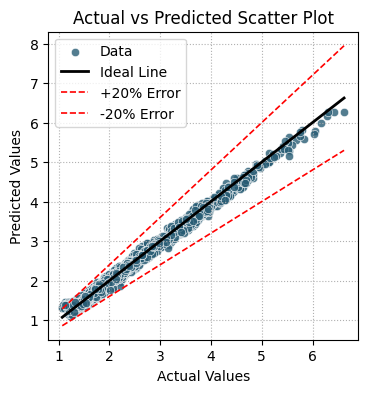

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(tn_train_out['Actual'])
y_predicted = np.array(tn_train_out['Predicted'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(1, 7, 1))  # X-axis ticks
plt.yticks(np.arange(1, 9, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

In [ ]:
# Get the evaluation metrics from the test set
test_tn_mse = mean_squared_error(tn_test_out['Actual'], tn_test_out['Predicted'])
test_tn_rmse = math.sqrt(test_tn_mse)
test_tn_r2 = r2_score(tn_test_out['Actual'], tn_test_out['Predicted'])
test_tn_mape = mean_absolute_percentage_error(tn_test_out['Actual'], tn_test_out['Predicted'])
test_tn_a20_index = RegressionMetric(np.array(tn_test_out['Actual']), np.array(tn_test_out['Predicted'])).a20_index()
print('RMSE: ', test_tn_rmse)
print('MAPE: ', test_tn_mape)
print('R2: ', test_tn_r2)
print('A20 Index: ', test_tn_a20_index)

RMSE:  0.09380443867639461
MAPE:  0.03496879398882602
R2:  0.9872051208646173
A20 Index:  0.99609375


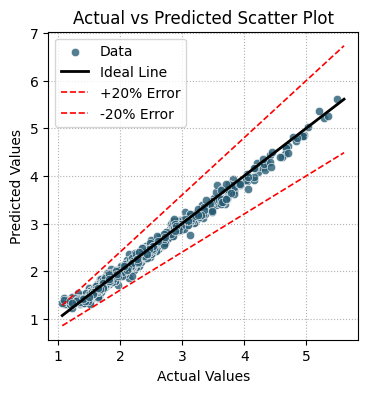

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(tn_test_out['Actual'])
y_predicted = np.array(tn_test_out['Predicted'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(1, 6, 1))  # X-axis ticks
plt.yticks(np.arange(1, 8, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

## **Multilayer Perceptron**

In [ ]:
# Get the evaluation metrics from the train set
train_mlp_mse = mean_squared_error(mlp_train_out['Actual'], mlp_train_out['Predicted'])
train_mlp_rmse = math.sqrt(train_mlp_mse)
train_mlp_r2 = r2_score(mlp_train_out['Actual'], mlp_train_out['Predicted'])
train_mlp_mape = mean_absolute_percentage_error(mlp_train_out['Actual'], mlp_train_out['Predicted'])
train_mlp_a20_index = RegressionMetric(np.array(mlp_train_out['Actual']), np.array(mlp_train_out['Predicted'])).a20_index()
print('RMSE: ', train_mlp_rmse)
print('MAPE: ', train_mlp_mape)
print('R2: ', train_mlp_r2)
print('A20 Index: ', train_mlp_a20_index)

RMSE:  0.07003931979887994
MAPE:  0.02302136759596769
R2:  0.9938227997381763
A20 Index:  1.0


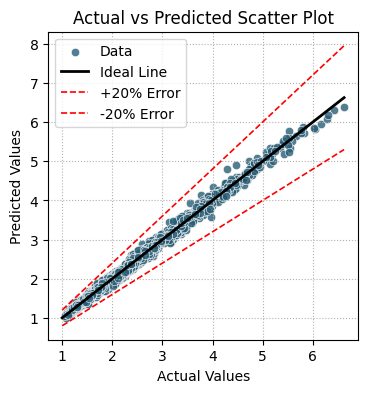

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(mlp_train_out['Actual'])
y_predicted = np.array(mlp_train_out['Predicted'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(1, 7, 1))  # X-axis ticks
plt.yticks(np.arange(1, 9, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

In [ ]:
# Get the evaluation metrics from the test set
test_mlp_mse = mean_squared_error(mlp_test_out['Actual'], mlp_test_out['Predicted'])
test_mlp_rmse = math.sqrt(test_mlp_mse)
test_mlp_r2 = r2_score(mlp_test_out['Actual'], mlp_test_out['Predicted'])
test_mlp_mape = mean_absolute_percentage_error(mlp_test_out['Actual'], mlp_test_out['Predicted'])
test_mlp_a20_index = RegressionMetric(np.array(mlp_test_out['Actual']), np.array(mlp_test_out['Predicted'])).a20_index()
print('RMSE: ', test_mlp_rmse)
print('MAPE: ', test_mlp_mape)
print('R2: ', test_mlp_r2)
print('A20 Index: ', test_mlp_a20_index)

RMSE:  0.07326873552912773
MAPE:  0.024060249692683666
R2:  0.9921940313475407
A20 Index:  1.0


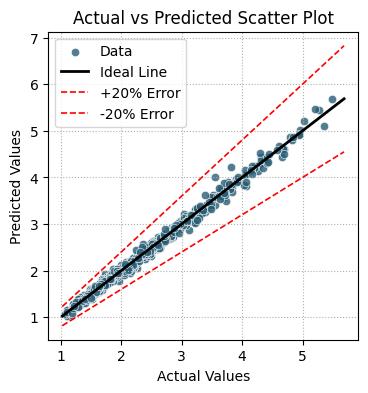

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(mlp_test_out['Actual'])
y_predicted = np.array(mlp_test_out['Predicted'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(1, 6, 1))  # X-axis ticks
plt.yticks(np.arange(1, 8, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

## **Kolmogorov-Arnold Networks**

In [ ]:
# Get the evaluation metrics from the train set
train_kans_mse = mean_squared_error(kans_train_out['Actual'], kans_train_out['Test Predicted'])
train_kans_rmse = math.sqrt(train_kans_mse)
train_kans_r2 = r2_score(kans_train_out['Actual'], kans_train_out['Test Predicted'])
train_kans_mape = mean_absolute_percentage_error(kans_train_out['Actual'], kans_train_out['Test Predicted'])
train_kans_a20_index = RegressionMetric(np.array(kans_train_out['Actual']), np.array(kans_train_out['Test Predicted'])).a20_index()
print('RMSE: ', train_kans_rmse)
print('MAPE: ', train_kans_mape)
print('R2: ', train_kans_r2)
print('A20 Index: ', train_kans_a20_index)

RMSE:  0.040845740251368945
MAPE:  0.013534731497890237
R2:  0.9978991193345035
A20 Index:  1.0


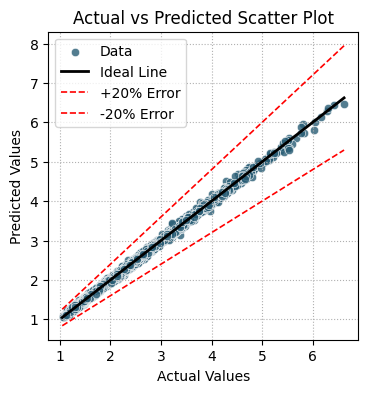

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(kans_train_out['Actual'])
y_predicted = np.array(kans_train_out['Test Predicted'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(1, 7, 1))  # X-axis ticks
plt.yticks(np.arange(1, 9, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

In [ ]:
# Get the evaluation metrics from the test set
test_kans_mse = mean_squared_error(kans_test_out['Actual'], kans_test_out['Test Predicted'])
test_kans_rmse = math.sqrt(test_kans_mse)
test_kans_r2 = r2_score(kans_test_out['Actual'], kans_test_out['Test Predicted'])
test_kans_mape = mean_absolute_percentage_error(kans_test_out['Actual'], kans_test_out['Test Predicted'])
test_kans_a20_index = RegressionMetric(np.array(kans_test_out['Actual']), np.array(kans_test_out['Test Predicted'])).a20_index()
print('RMSE: ', test_kans_rmse)
print('MAPE: ', test_kans_mape)
print('R2: ', test_kans_r2)
print('A20 Index: ', test_kans_a20_index)

RMSE:  0.0501405668728683
MAPE:  0.016093896832630714
R2:  0.9963443223879556
A20 Index:  1.0


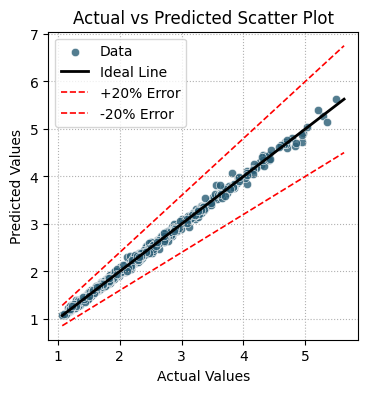

In [ ]:
# Sample actual and predicted values (replace with your actual data)
y_actual = np.array(kans_test_out['Actual'])
y_predicted = np.array(kans_test_out['Test Predicted'])

# Define the plot range
min_val = min(y_actual.min(), y_predicted.min()) * 1
max_val = max(y_actual.max(), y_predicted.max()) * 1

# Create the scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_actual, y=y_predicted, color='#285c74', alpha=0.8, label="Data")

# Ideal y = x line (perfect predictions)
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=2, label="Ideal Line")

# +20% and -20% error lines
plt.plot([min_val, max_val], [min_val * 1.2, max_val * 1.2], 'r--', linewidth=1.2, label="+20% Error")
plt.plot([min_val, max_val], [min_val * 0.8, max_val * 0.8], 'r--', linewidth=1.2, label="-20% Error")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid(True)

# Set x and y axis ticks from 1 to 6.7 with step 1
plt.xticks(np.arange(1, 6, 1))  # X-axis ticks
plt.yticks(np.arange(1, 8, 1))  # Y-axis ticks
plt.grid(True, linestyle=':')  # Set grid lines to dotted

# Show plot
plt.show()

## **Overall**

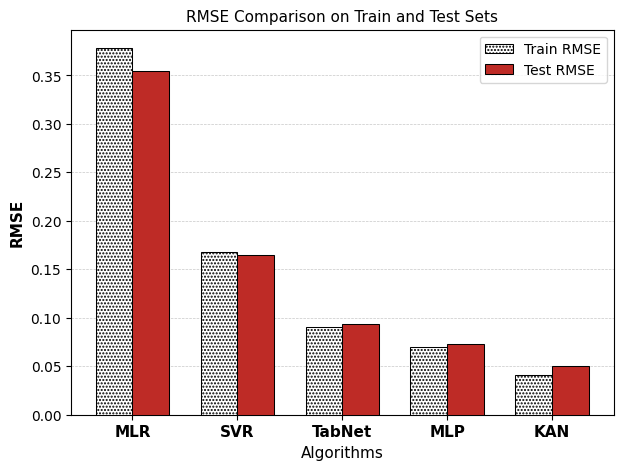

In [ ]:
# SHOW THE RMSE COMPARISON IN THE BAR CHART

# Algorithms
algorithms = ["MLR", "SVR", "TabNet", "MLP", "KAN"]

# rmse values for Train and Test sets
rmse_train = [train_lr_rmse, train_svr_rmse, train_tn_rmse, train_mlp_rmse, train_kans_rmse]
rmse_test = [test_lr_rmse, test_svr_rmse, test_tn_rmse, test_mlp_rmse, test_kans_rmse]

# Bar positions
x = np.arange(len(algorithms))
width = 0.35  # Width of the bars

# Create figure
plt.figure(figsize=(7, 5))

# Enable grid and make it appear in front of bars
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, axis="y", zorder=0)

# Plot bars with patterns and borders
bars1 = plt.bar(x - width/2, rmse_train, width, label="Train RMSE", color="white",
                edgecolor="black", linewidth=0.75, hatch=".....", zorder=3)
bars2 = plt.bar(x + width/2, rmse_test, width, label="Test RMSE", color="#be2b26",
                edgecolor="black", linewidth=0.75, zorder=3)

# Fix x-ticks to be at the center of each group
plt.xticks(ticks=x, labels=algorithms, ha="center", fontsize=11, fontweight='bold')

# Make y-axis label bold
plt.ylabel("RMSE", fontsize=11, fontweight='bold')

# Labels and title
plt.xlabel("Algorithms", fontsize=11)
plt.title("RMSE Comparison on Train and Test Sets", fontsize=11)
plt.legend()

# Show the plot
plt.show()

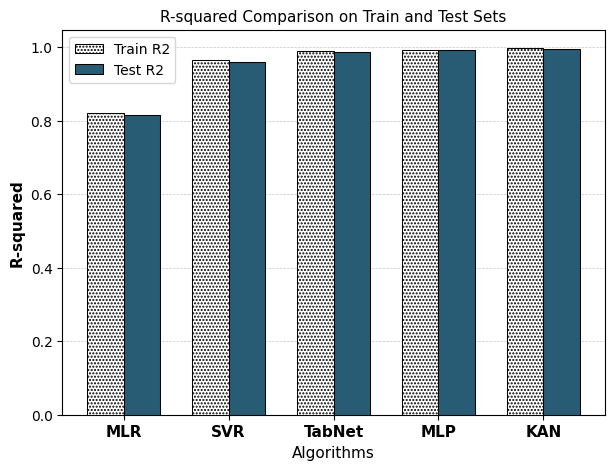

In [ ]:
# SHOW THE RMSE COMPARISON IN THE BAR CHART

# Algorithms
algorithms = ["MLR", "SVR", "TabNet", "MLP", "KAN"]

# r2 values for Train and Test sets
r2_train = [train_lr_r2, train_svr_r2, train_tn_r2, train_mlp_r2, train_kans_r2]
r2_test = [test_lr_r2, test_svr_r2, test_tn_r2, test_mlp_r2, test_kans_r2]

# Bar positions
x = np.arange(len(algorithms))
width = 0.35  # Width of the bars

# Create figure
plt.figure(figsize=(7, 5))

# Enable grid and make it appear in front of bars
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, axis="y", zorder=0)

# Plot bars with patterns and borders
bars1 = plt.bar(x - width/2, r2_train, width, label="Train R2", color="white",
                edgecolor="black", linewidth=0.75, hatch=".....", zorder=3)
bars2 = plt.bar(x + width/2, r2_test, width, label="Test R2", color="#285c74",
                edgecolor="black", linewidth=0.75, zorder=3)

# Fix x-ticks to be at the center of each group
plt.xticks(ticks=x, labels=algorithms, ha="center", fontsize=11, fontweight='bold')

# Make y-axis label bold
plt.ylabel("R-squared", fontsize=11, fontweight='bold')

# Labels and title
plt.xlabel("Algorithms", fontsize=11)
plt.title("R-squared Comparison on Train and Test Sets", fontsize=11)
plt.legend()

# Show the plot
plt.show()

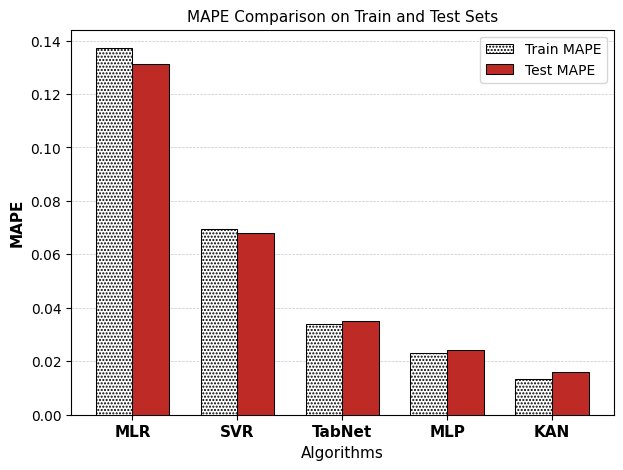

In [ ]:
# Algorithms
algorithms = ["MLR", "SVR", "TabNet", "MLP", "KAN"]

# MAPE values for Train and Test sets
mape_train = [train_lr_mape, train_svr_mape, train_tn_mape, train_mlp_mape, train_kans_mape]
mape_test = [test_lr_mape, test_svr_mape, test_tn_mape, test_mlp_mape, test_kans_mape]

# Bar positions
x = np.arange(len(algorithms))
width = 0.35  # Width of the bars

# Create figure
plt.figure(figsize=(7, 5))

# Enable grid and make it appear in front of bars
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, axis="y", zorder=0)

# Plot bars with patterns and borders
bars1 = plt.bar(x - width/2, mape_train, width, label="Train MAPE", color="white",
                edgecolor="black", linewidth=0.75, hatch=".....", zorder=3)
bars2 = plt.bar(x + width/2, mape_test, width, label="Test MAPE", color="#be2b26",
                edgecolor="black", linewidth=0.75, zorder=3)

# Fix x-ticks to be at the center of each group
plt.xticks(ticks=x, labels=algorithms, ha="center", fontsize=11, fontweight='bold')

# Make y-axis label bold
plt.ylabel("MAPE", fontsize=11, fontweight='bold')

# Labels and title
plt.xlabel("Algorithms", fontsize=11)
plt.title("MAPE Comparison on Train and Test Sets", fontsize=11)
plt.legend()

# Show the plot
plt.show()


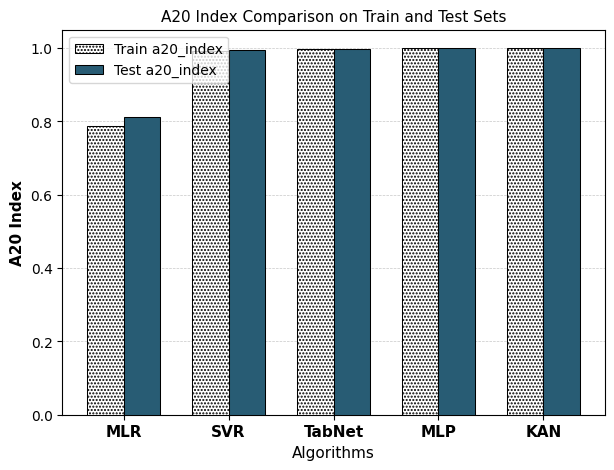

In [ ]:
# SHOW THE A20-INDEX COMPARISON IN THE BAR CHART

# Algorithms
algorithms = ["MLR", "SVR", "TabNet", "MLP", "KAN"]

# a20_index values for Train and Test sets
a20_index_train = [train_lr_a20_index, train_svr_a20_index, train_tn_a20_index, train_mlp_a20_index, train_kans_a20_index]
a20_index_test = [test_lr_a20_index, test_svr_a20_index, test_tn_a20_index, test_mlp_a20_index, test_kans_a20_index]

# Bar positions
x = np.arange(len(algorithms))
width = 0.35  # Width of the bars

# Create figure
plt.figure(figsize=(7, 5))

# Enable grid and make it appear in front of bars
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, axis="y", zorder=0)

# Plot bars with patterns and borders
bars1 = plt.bar(x - width/2, a20_index_train, width, label="Train a20_index", color="white",
                edgecolor="black", linewidth=0.75, hatch=".....", zorder=3)
bars2 = plt.bar(x + width/2, a20_index_test, width, label="Test a20_index", color="#285c74",
                edgecolor="black", linewidth=0.75, zorder=3)

# Fix x-ticks to be at the center of each group
plt.xticks(ticks=x, labels=algorithms, ha="center", fontsize=11, fontweight='bold')

# Make y-axis label bold
plt.ylabel("A20 Index", fontsize=11, fontweight='bold')

# Labels and title
plt.xlabel("Algorithms", fontsize=11)
plt.title("A20 Index Comparison on Train and Test Sets", fontsize=11)
plt.legend()

# Show the plot
plt.show()